In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("marketing_campaign.csv",delimiter='\t', index_col='ID')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.dropna(inplace=True)

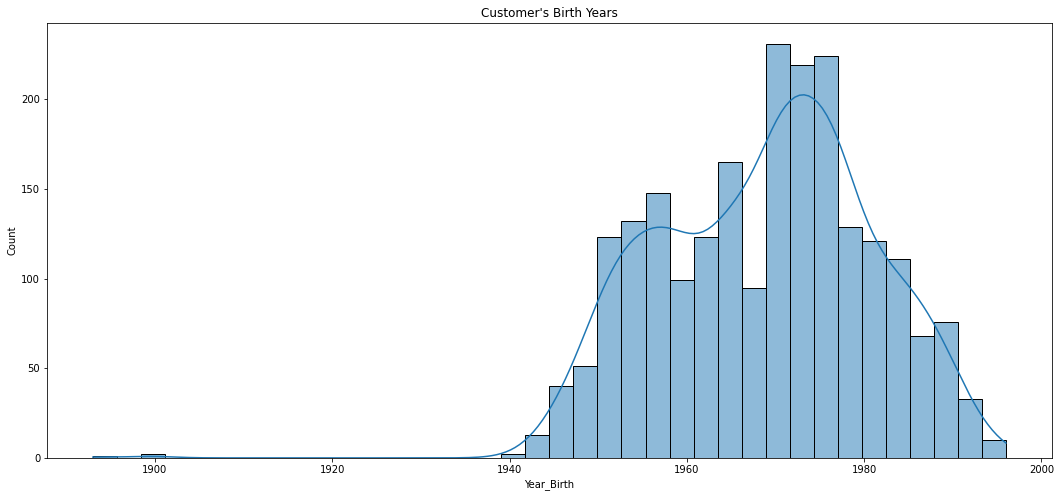

In [5]:
plt.figure(figsize=(18,8))
ax = sns.histplot(data=df, x="Year_Birth",kde=True)
plt.title("Customer's Birth Years")
plt.show()

### Most of customers birth of year is between 1970-1980

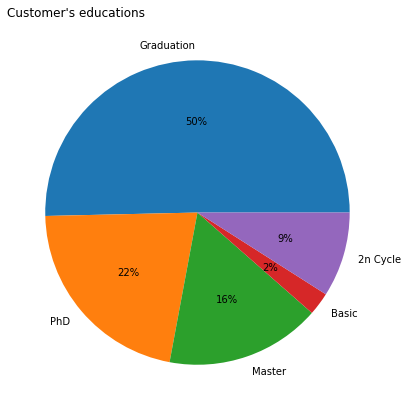

In [6]:
list_of_education = list(df["Education"].unique()) # list of unique  values of Education

list_of_education_num = [] # quantity of Education level of users
for i in list_of_education:
    list_of_education_num.append(df[df["Education"]==i].shape[0])

plt.figure(figsize=(7, 7))  
plt.title("Customer's educations",loc='left')
plt.pie(list_of_education_num, labels = list_of_education, autopct='%.0f%%')
plt.show()

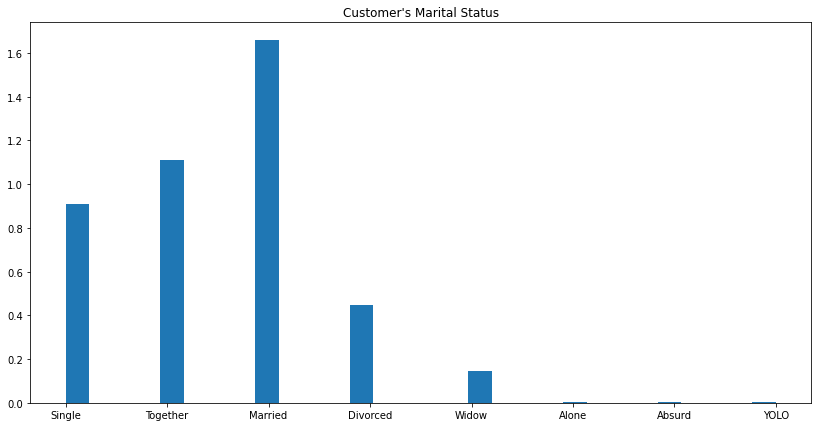

In [7]:
plt.figure(figsize=(14, 7)) 
plt.title("Customer's Marital Status")
plt.hist(df["Marital_Status"], density=True, bins=30)
plt.show()

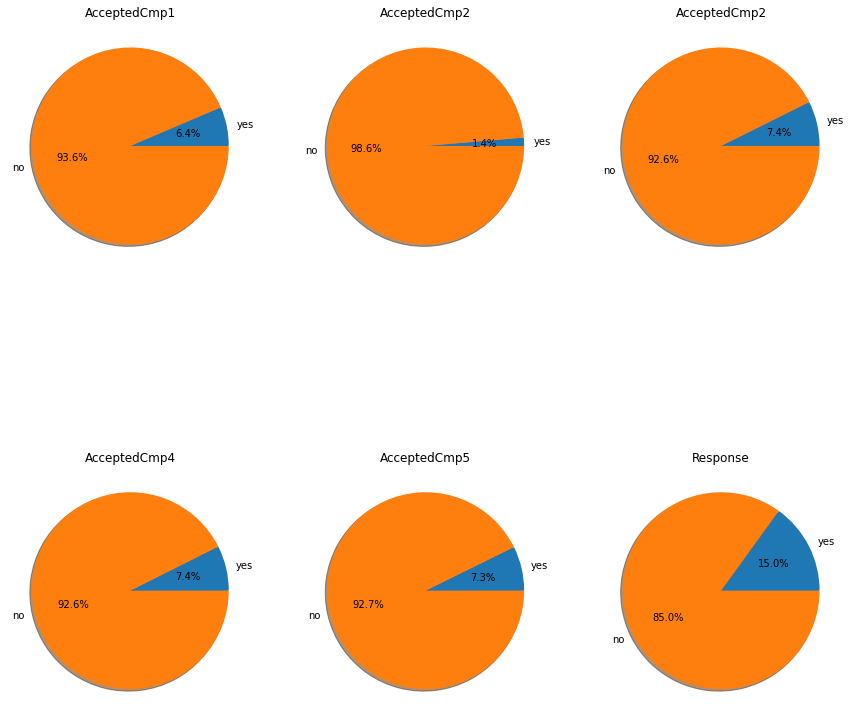

In [8]:
label_yes_no = ["yes","no"]
val = [1,0]
AcceptedCmp1_value = []
AcceptedCmp2_value = []
AcceptedCmp3_value = []
AcceptedCmp4_value = []
AcceptedCmp5_value = []
AcceptedCmp6_value = []
Response = []
for i in val:
    AcceptedCmp1_value.append(df[df["AcceptedCmp1"]==i].shape[0])
    AcceptedCmp2_value.append(df[df["AcceptedCmp2"]==i].shape[0])
    AcceptedCmp3_value.append(df[df["AcceptedCmp3"]==i].shape[0])
    AcceptedCmp4_value.append(df[df["AcceptedCmp4"]==i].shape[0])
    AcceptedCmp5_value.append(df[df["AcceptedCmp5"]==i].shape[0])
    Response.append(df[df["Response"]==i].shape[0])

fig, axs = plt.subplots(2, 3,figsize=(15,15))

axs[0, 0].pie(AcceptedCmp1_value, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[0, 0].title.set_text('AcceptedCmp1')

axs[0, 1].pie(AcceptedCmp2_value, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[0, 1].title.set_text('AcceptedCmp2')

axs[0, 2].pie(AcceptedCmp3_value, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[0, 2].title.set_text('AcceptedCmp2')

axs[1, 0].pie(AcceptedCmp4_value, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[1, 0].title.set_text('AcceptedCmp4')

axs[1, 1].pie(AcceptedCmp5_value, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[1, 1].title.set_text('AcceptedCmp5')

axs[1, 2].pie(Response, labels=label_yes_no, autopct='%1.1f%%', shadow=True)
axs[1, 2].title.set_text('Response')

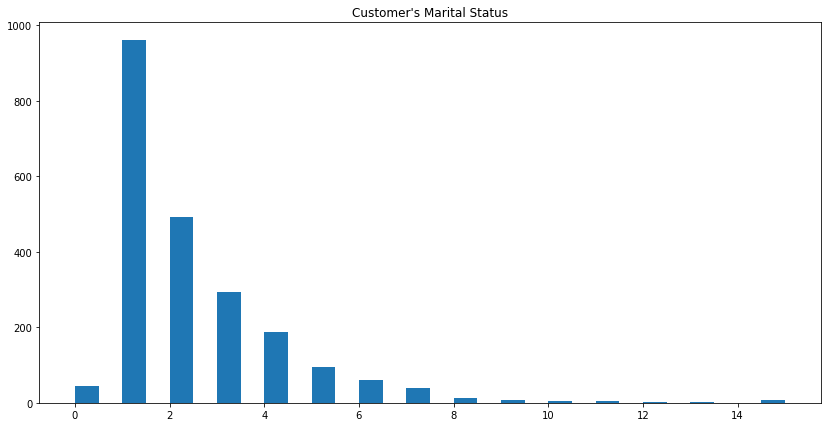

In [9]:
plt.figure(figsize=(14, 7)) 
plt.title("Customer's Marital Status")
plt.hist(df["NumDealsPurchases"], density=False, bins=30)
plt.show()

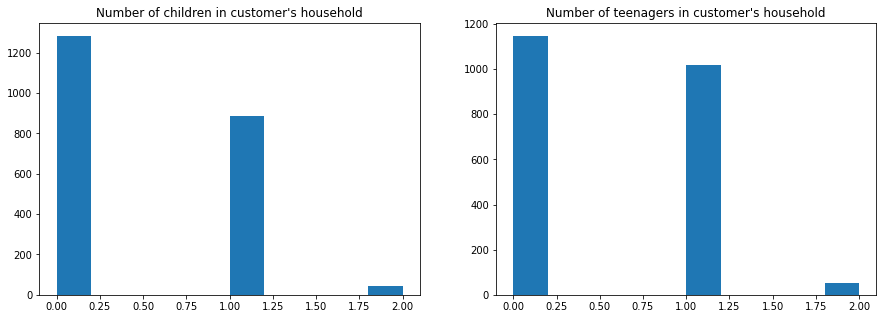

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(df["Kidhome"])
plt.title("Number of children in customer's household")
plt.subplot(1, 2, 2)
plt.title("Number of teenagers in customer's household")
plt.hist(df["Teenhome"])
plt.show()

In [11]:
df1 = df[df["Income"]<99999]

In [12]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Lets make it cleaning some value beacuse of out of layer

In [13]:
df1 = df[df["Income"]<99999]
df1 = df1[df1["Income"]>11111]

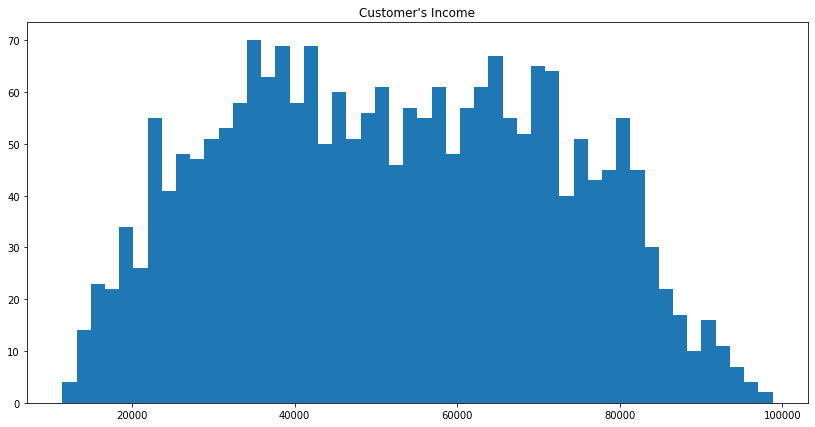

In [14]:
plt.figure(figsize=(14,7)) 
plt.title("Customer's Income")
plt.hist(df1["Income"], density=False, bins=50)
plt.show()

In [15]:
AcceptedCmp1_value

[142, 2074]

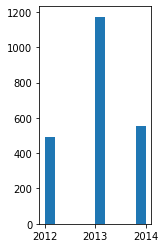

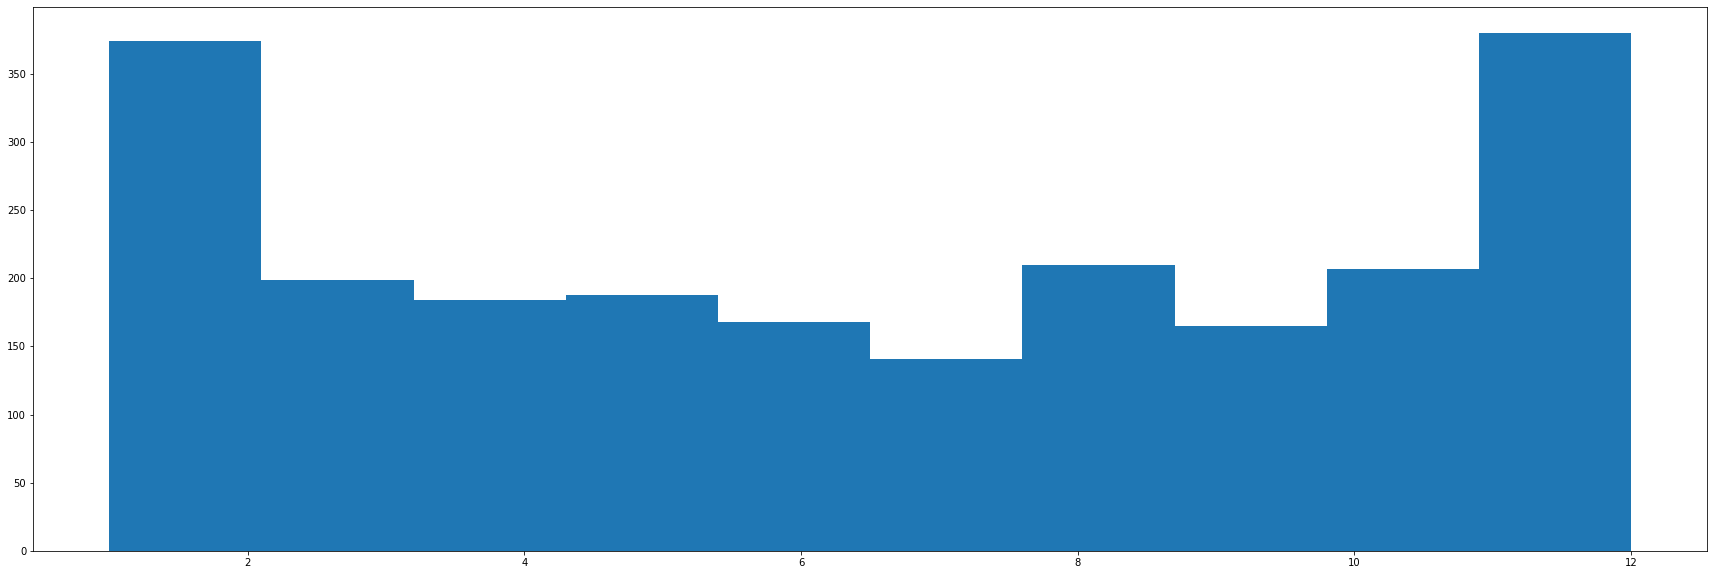

In [16]:
plt.figure(figsize=(2,4)) 
plt.hist(pd.to_datetime(df["Dt_Customer"]).dt.year)
plt.show()
plt.figure(figsize=(30,10)) 
plt.hist(pd.to_datetime(df["Dt_Customer"]).dt.month)
plt.show()

In [17]:
pd.to_datetime(df["Dt_Customer"]).dt.year.unique()

array([2012, 2014, 2013], dtype=int64)

In [18]:
un = list(pd.to_datetime(df["Dt_Customer"]).dt.year.unique())
my_list = list(pd.to_datetime(df["Dt_Customer"]).dt.year)
numbers = []
for i in un:
    numbers.append(my_list.count(i))

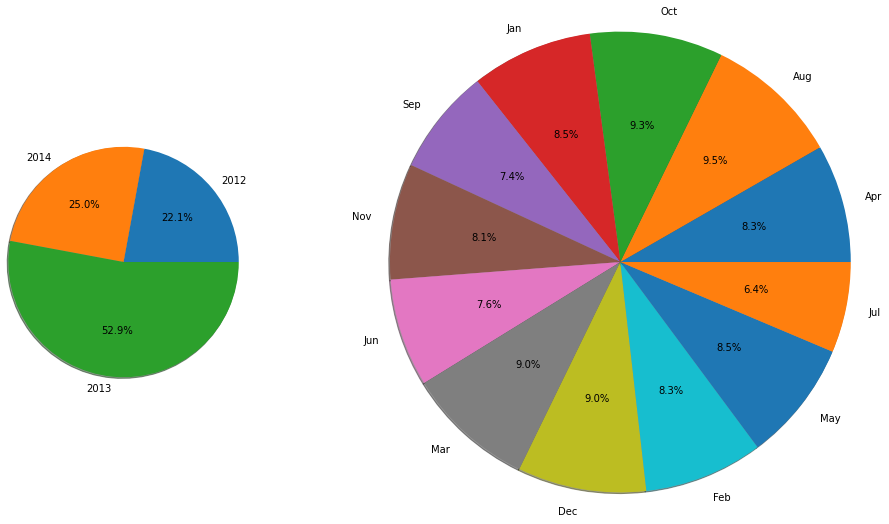

In [19]:
years = []
years_name = list(pd.to_datetime(df["Dt_Customer"]).dt.year.unique())
for i in list(pd.to_datetime(df["Dt_Customer"]).dt.year.unique()):
    years.append(list(pd.to_datetime(df["Dt_Customer"]).dt.year).count(i))

    
month = []
month_name = list(pd.to_datetime(df["Dt_Customer"]).dt.month.unique())
# its just to show mothn not by numbers by names
real_names = []
for i in month_name:
    if i ==1:
        real_names.append("Jan")
    elif i ==2:
        real_names.append("Feb")
    elif i ==3:
        real_names.append("Mar")
    elif i ==4:
        real_names.append("Apr")
    elif i ==5:
        real_names.append("May")
    elif i ==6:
        real_names.append("Jun")
    elif i ==7:
        real_names.append("Jul")
    elif i ==8:
        real_names.append("Aug")
    elif i ==9:
        real_names.append("Sep")
    elif i ==10:
        real_names.append("Oct")
    elif i ==11:
        real_names.append("Nov")
    elif i ==12:
        real_names.append("Dec")

for i in list(pd.to_datetime(df["Dt_Customer"]).dt.month.unique()):
    month.append(list(pd.to_datetime(df["Dt_Customer"]).dt.month).count(i))


fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1.2, .5])

ax1.pie(years, labels=years_name, radius = 2,autopct='%1.1f%%',shadow=True)
ax2 = fig.add_axes([1.5, .0, .5, .5])
ax2.pie(month, labels=real_names, radius = 4,autopct='%1.1f%%',shadow=True)

plt.show()

 The pie of date of customer's enrollment with the company is showing us most of customers are joined in 2013 (more then 50%) and if we will check by month rate of enrolling we can see during October month showing us high and Jun is lower result but in general its so closed rates 

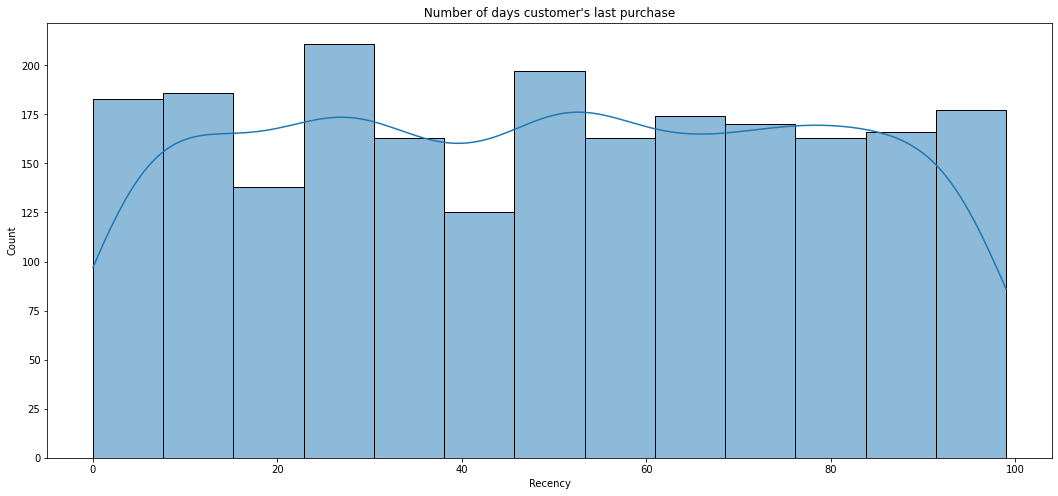

In [20]:
# Lets check Number of days since customer's last purchase

plt.figure(figsize=(18,8))
ax = sns.histplot(data=df, x="Recency",kde=True)
plt.title(" Number of days customer's last purchase ")
plt.show()

Here we can say most of customers (more than 200) made their last purchase about 25 days ago and lower group of customers ( almost 125 member ) made it almost 40 days ago

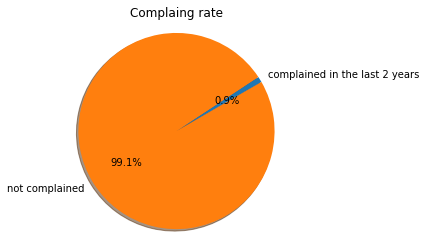

In [21]:
# displaying customers complaning rates
labels = ["complained in the last 2 years", "not complained"]
numbers = [int(df[df["Complain"]==1].shape[0]),int(df[df["Complain"]==0].shape[0])]
fig1, ax1 = plt.subplots()
ax1.pie(numbers, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
ax1.title.set_text('Complaing rate')
plt.show()

Its good things only 0.9% of customers made complaning during last 2 years

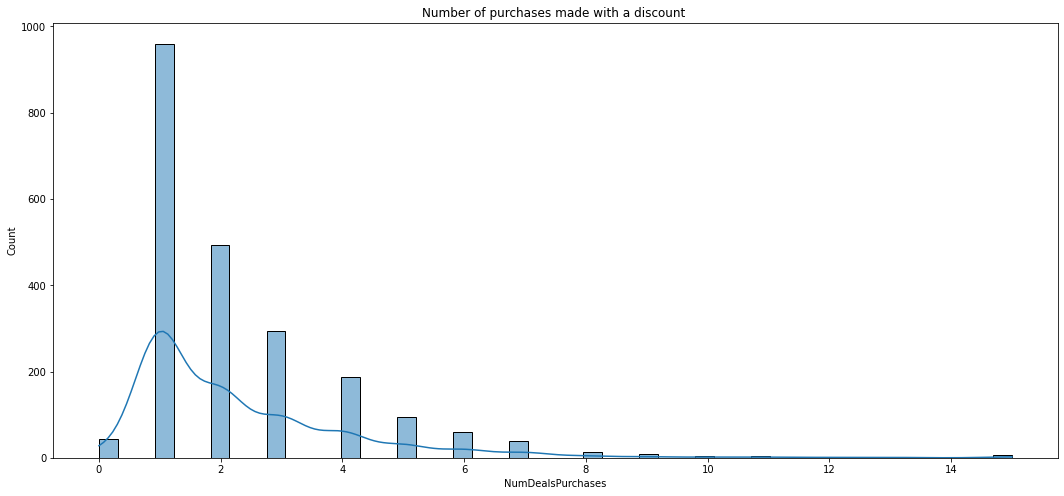

In [22]:
plt.figure(figsize=(18,8))
ax = sns.histplot(data=df, x="NumDealsPurchases",kde=True)
plt.title("Number of purchases made with a discount ")
plt.show()

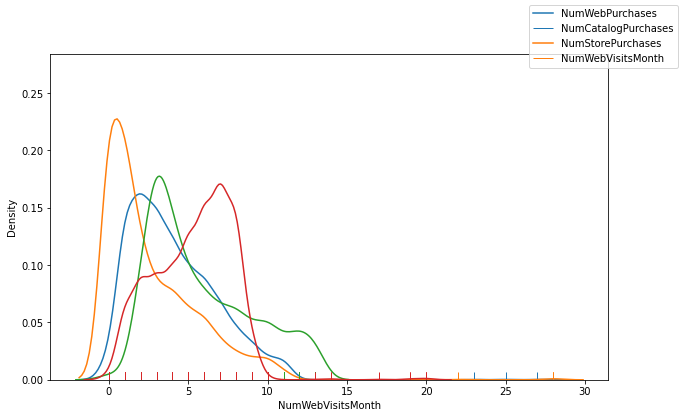

In [23]:
import warnings
warnings.filterwarnings("ignore")
target_1 = df["NumWebPurchases"]
target_2 = df["NumCatalogPurchases"]
target_3 = df["NumStorePurchases"]
target_4 = df["NumWebVisitsMonth"]

fig = plt.figure(figsize=(10,6))

sns.distplot(target_1, hist=False, rug=True)
sns.distplot(target_2, hist=False, rug=True)
sns.distplot(target_3, hist=False, rug=True)
sns.distplot(target_4, hist=False, rug=True)
fig.legend(labels=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'])

plt.show()

# Data Cleaning

In [24]:
df.T

ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
MntFruits,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3


In [25]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Here we can see to much difference between max and min value for fixing it /i will use log function 

In [26]:
df["Income2"] = df["Income"].apply(lambda x : math.log(x))

In [27]:
a = ["MntWines","MntFishProducts","MntGoldProds","MntSweetProducts"]

In [28]:
for i in a:
    print(df[i].describe())

count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64
count    2216.000000
mean       37.637635
std        54.752082
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64
count    2216.000000
mean       43.965253
std        51.815414
min         0.000000
25%         9.000000
50%        24.500000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64
count    2216.000000
mean       27.028881
std        41.072046
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64


In [29]:
df = df[df["MntWines"]>0]
df = df[df["MntFishProducts"]>0]
df = df[df["MntGoldProds"]>0]
df = df[df["MntSweetProducts"]>0]

I will do same prossedure for this column also and also i will check all 

In [30]:
df["MntWines2"] = df["MntWines"].apply(lambda x : math.log(x))
df["MntMeatProducts2"] = df["MntMeatProducts"].apply(lambda x : math.log(x))
df["MntFishProducts2"] = df["MntFishProducts"].apply(lambda x : math.log(x))
df["MntGoldProds2"] = df["MntGoldProds"].apply(lambda x : math.log(x))
df["MntSweetProducts2"] = df["MntSweetProducts"].apply(lambda x : math.log(x))

# Make data set for training

In [31]:
df.T

ID,5524,2174,4141,6182,5324,965,6177,4855,5899,387,...,4478,7004,9817,8080,9432,8372,10870,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1971,1985,1974,1950,1976,...,1979,1984,1970,1986,1977,1974,1967,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,PhD,PhD,PhD,Basic,...,Graduation,Graduation,Master,Graduation,Graduation,Graduation,Graduation,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Divorced,Married,Together,Together,Married,...,Married,Single,Single,Single,Together,Married,Married,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,55635.0,33454.0,30351.0,5648.0,7500.0,...,63777.0,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,1,1,1,0,...,1,1,0,0,1,1,0,0,0,1
Teenhome,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,13-11-2012,08-05-2013,06-06-2013,13-03-2014,13-11-2012,...,24-03-2013,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,34,32,19,68,59,...,87,82,71,50,23,81,46,91,8,40
MntWines,635,11,426,11,173,235,76,14,28,6,...,457,24,853,5,9,3,709,908,428,84
MntFruits,88,1,49,4,43,65,10,0,0,16,...,5,3,10,1,14,3,43,48,30,3


In [32]:
df = df.drop(["MntWines","MntFishProducts","MntGoldProds","MntSweetProducts"],axis=1)

In [33]:
# years of birth and Dt_Customer not need keep and during visualization we 
#can see Complain is to low value for Complaining so we can drop it

df = df.drop(["Year_Birth","Complain","Dt_Customer"],axis=1)

In [34]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [35]:
df['Education'] = df['Education'].map({'Graduation':0,"PhD":1,"Basic":2,"Master":3,"2n Cycle":4})

In [36]:
df['Marital_Status'] = df['Marital_Status'].map({'Single':0,"Together":1,"Married":2,"Divorced":3,"Widow":5,"Alone":6,"Absurd":7,"YOLO":8})

In [37]:
df = df[df['Marital_Status']!=7]
df = df[df['Marital_Status']!=6]

In [38]:
df.T

ID,5524,2174,4141,6182,5324,965,6177,4855,5899,387,...,4478,7004,9817,8080,9432,8372,10870,7270,8235,9405
Education,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
Marital_Status,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000
Income,58138.000000,46344.000000,71613.000000,26646.000000,58293.000000,55635.000000,33454.000000,30351.000000,5648.000000,7500.000000,...,63777.000000,11012.000000,44802.000000,26816.000000,666666.000000,34421.000000,61223.000000,56981.000000,69245.000000,52869.000000
Kidhome,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
Teenhome,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
Recency,58.000000,38.000000,26.000000,26.000000,94.000000,34.000000,32.000000,19.000000,68.000000,59.000000,...,87.000000,82.000000,71.000000,50.000000,23.000000,81.000000,46.000000,91.000000,8.000000,40.000000
MntFruits,88.000000,1.000000,49.000000,4.000000,43.000000,65.000000,10.000000,0.000000,0.000000,16.000000,...,5.000000,3.000000,10.000000,1.000000,14.000000,3.000000,43.000000,48.000000,30.000000,3.000000
MntMeatProducts,546.000000,6.000000,127.000000,20.000000,118.000000,164.000000,56.000000,24.000000,6.000000,11.000000,...,106.000000,26.000000,143.000000,6.000000,18.000000,7.000000,182.000000,217.000000,214.000000,61.000000
NumDealsPurchases,3.000000,2.000000,1.000000,2.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,8.000000,3.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000
NumWebPurchases,8.000000,1.000000,8.000000,2.000000,5.000000,7.000000,4.000000,3.000000,1.000000,2.000000,...,11.000000,3.000000,9.000000,0.000000,3.000000,1.000000,9.000000,2.000000,6.000000,3.000000


# Clustering

In [39]:

wss=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    wss.append(kmean.inertia_)


Text(0.5, 1.0, 'Finding optimal K kluster')

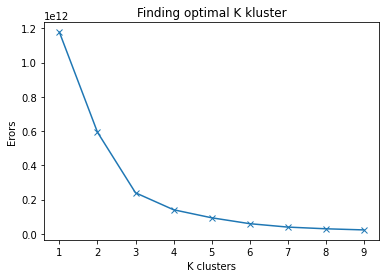

In [40]:
plt.plot(K,wss,marker='x')
plt.xlabel('K clusters')
plt.ylabel('Erors')
plt.title("Finding optimal K kluster")

In [41]:
k = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_k = k.fit_predict(df)


df['clusters'] = y_k

In [42]:
#Lets just display size of each groups
g1 = df[df['clusters']==0].shape[0]
g2 = df[df['clusters']==1].shape[0]
g3 = df[df['clusters']==2].shape[0]
print("Group 1 size is {},Group 2 size is {},Group 3 size is {},".format(g1,g2,g3))

Group 1 size is 600,Group 2 size is 402,Group 3 size is 579,


# Now we will do classfication df dataset 

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [80]:
X = df.drop('clusters',axis=1)
y = df['clusters']

In [82]:
scl = MinMaxScaler()
X = scl.fit_transform(X)

In [85]:
log_reg = LogisticRegression()
cls_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [90]:
my_all_cls = [log_reg,cls_tree,knn,lda,gnb]

In [96]:
for cl in my_all_cls:
    cl.fit(X_train,y_train)
    score_train = cl.score(X_train,y_train)
    score_test = cl.score(X_test,y_test)
    print("Train score at {} is {}".format(cl,score_train))
    print("Test score at {} is {}".format(cl,score_test))
    print("*"*50)
    

Train score at LogisticRegression() is 0.8514767932489451
Test score at LogisticRegression() is 0.8282828282828283
**************************************************
Train score at DecisionTreeClassifier() is 1.0
Test score at DecisionTreeClassifier() is 0.9974747474747475
**************************************************
Train score at KNeighborsClassifier() is 0.8312236286919831
Test score at KNeighborsClassifier() is 0.75
**************************************************
Train score at LinearDiscriminantAnalysis() is 0.9181434599156119
Test score at LinearDiscriminantAnalysis() is 0.8888888888888888
**************************************************
Train score at GaussianNB() is 0.7670886075949367
Test score at GaussianNB() is 0.7373737373737373
**************************************************


Here its clear that DecisionTreeClassifier() best solution in our case